# EDA

## Getting the Data

In [209]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400,AMAZON
2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300,AMAZON
2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700,AMAZON
2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800,AMAZON
2024-04-19,178.740005,179.000000,173.440002,174.630005,174.630005,55950000,AMAZON
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON
2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,AMAZON
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMAZON


## Descriptive Statistics about the Data

In [210]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,181.169682,182.628924,179.809004,181.282909,180.891567,5.781501e+07
std,8.735188,8.594316,8.702606,8.674535,8.639346,1.765801e+07
min,164.889999,166.399994,164.080002,165.000000,164.909744,2.404830e+07
25%,173.240005,174.905006,172.050003,173.690002,173.265129,4.678545e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238220,5.366560e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909805,6.401530e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


## Information About the Data

In [211]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-28 to 2024-04-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price

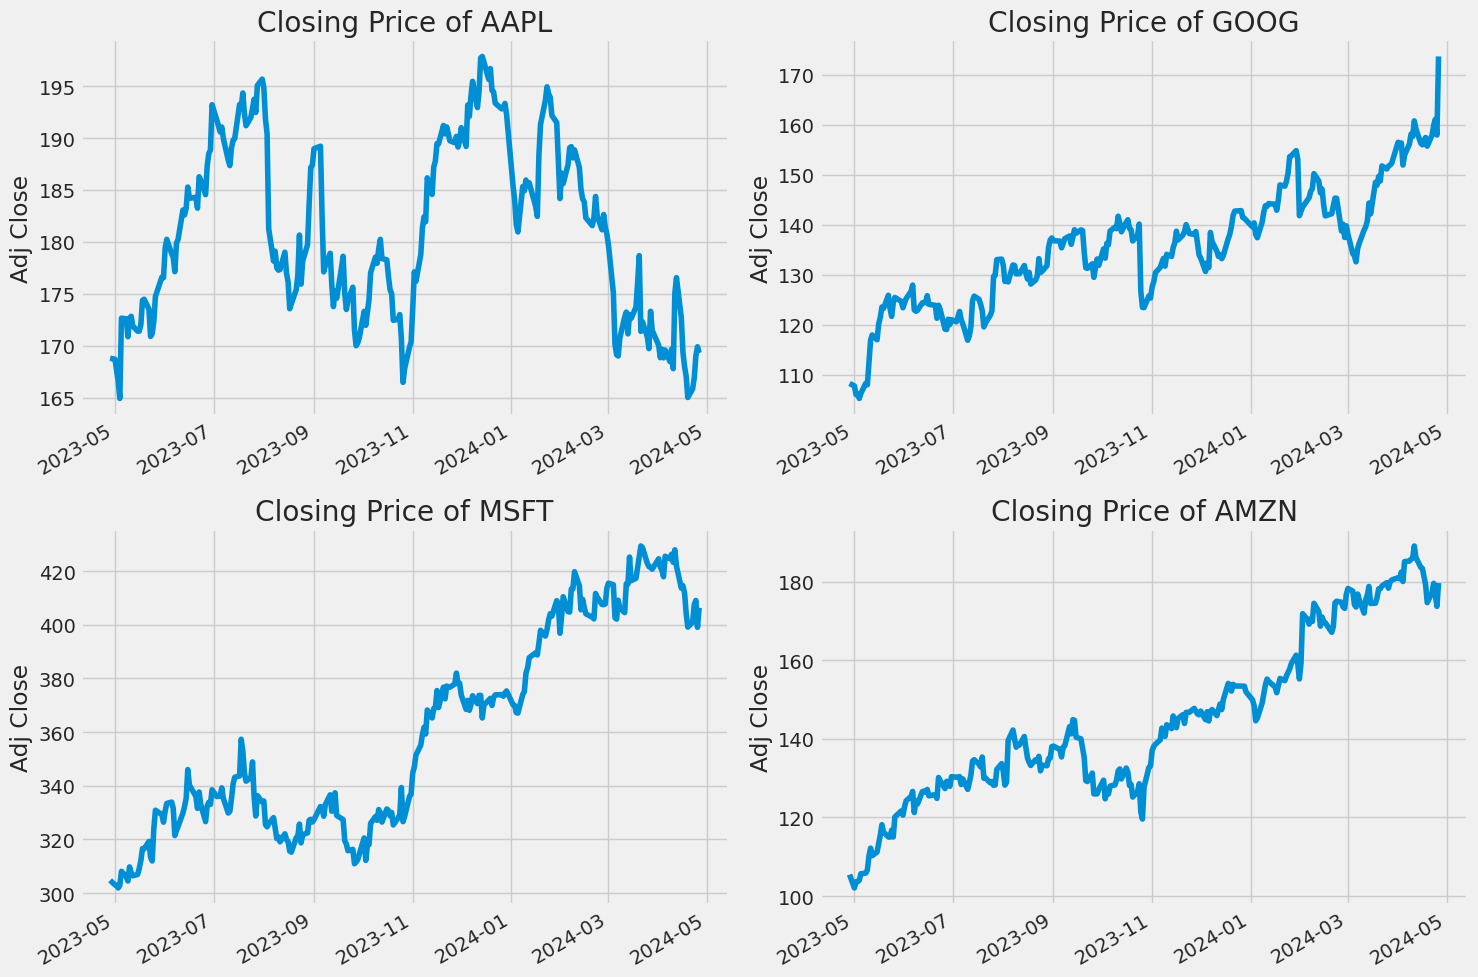

In [212]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales

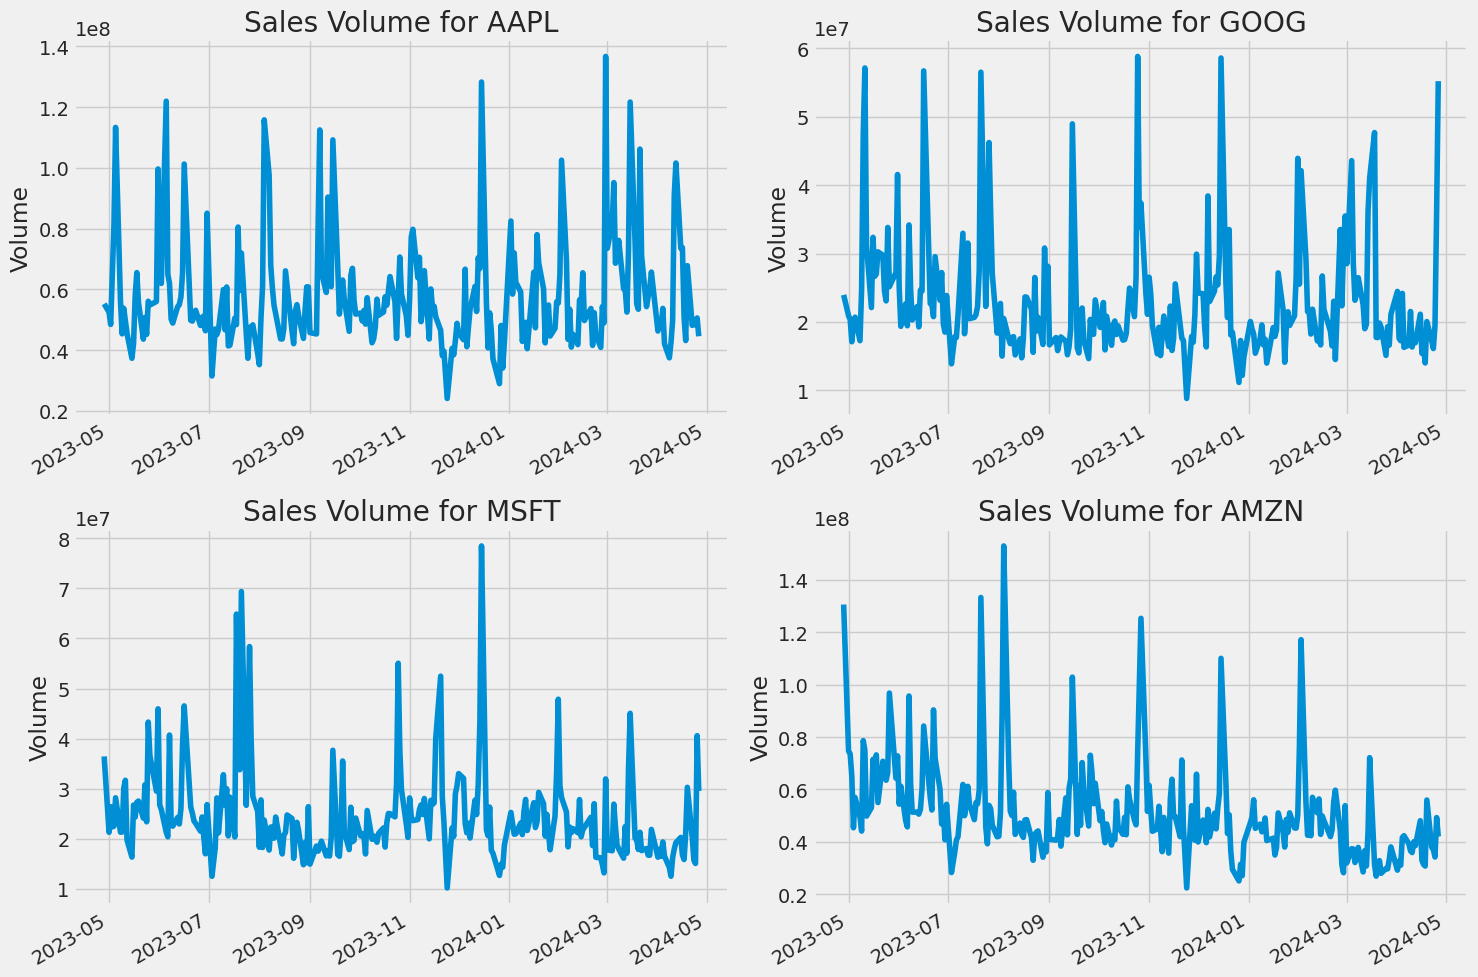

In [213]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

## moving average

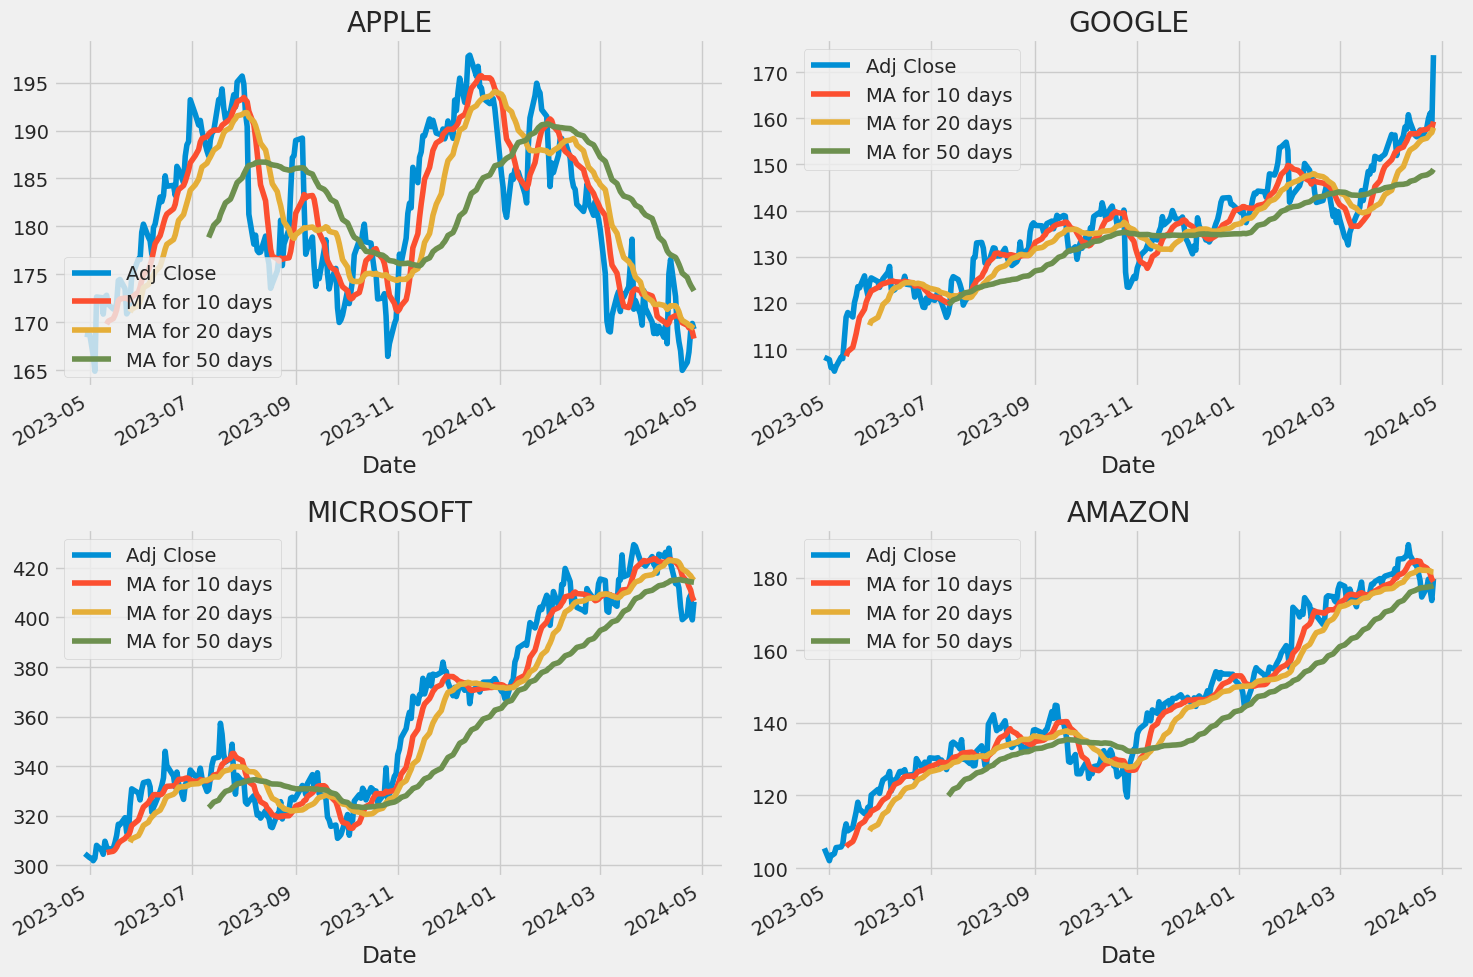

In [214]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## the daily return of the stock on average

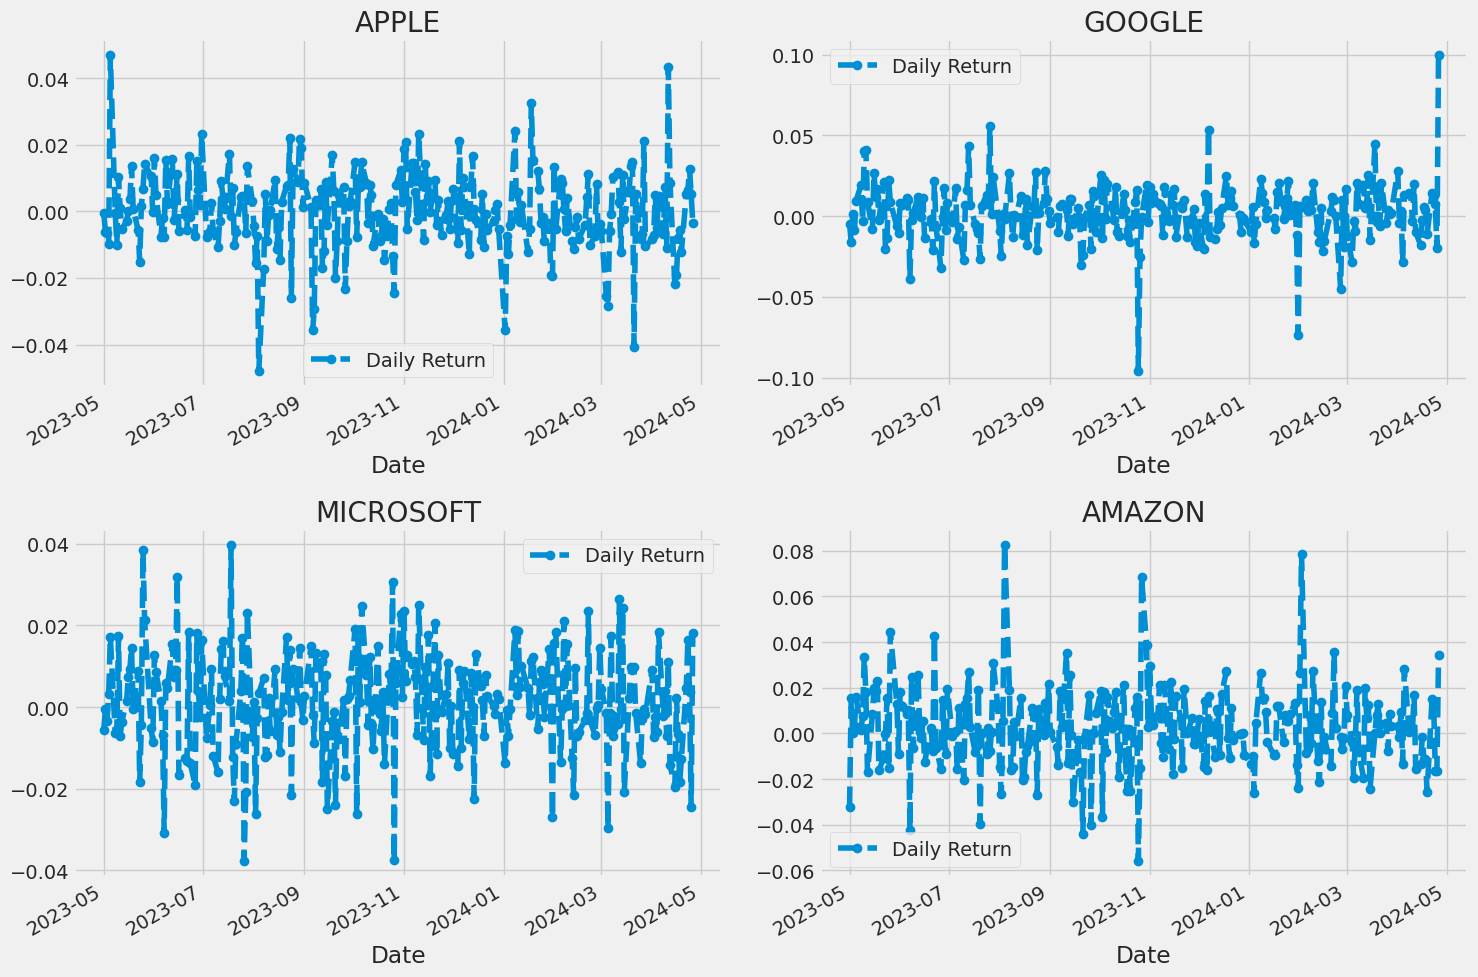

In [215]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

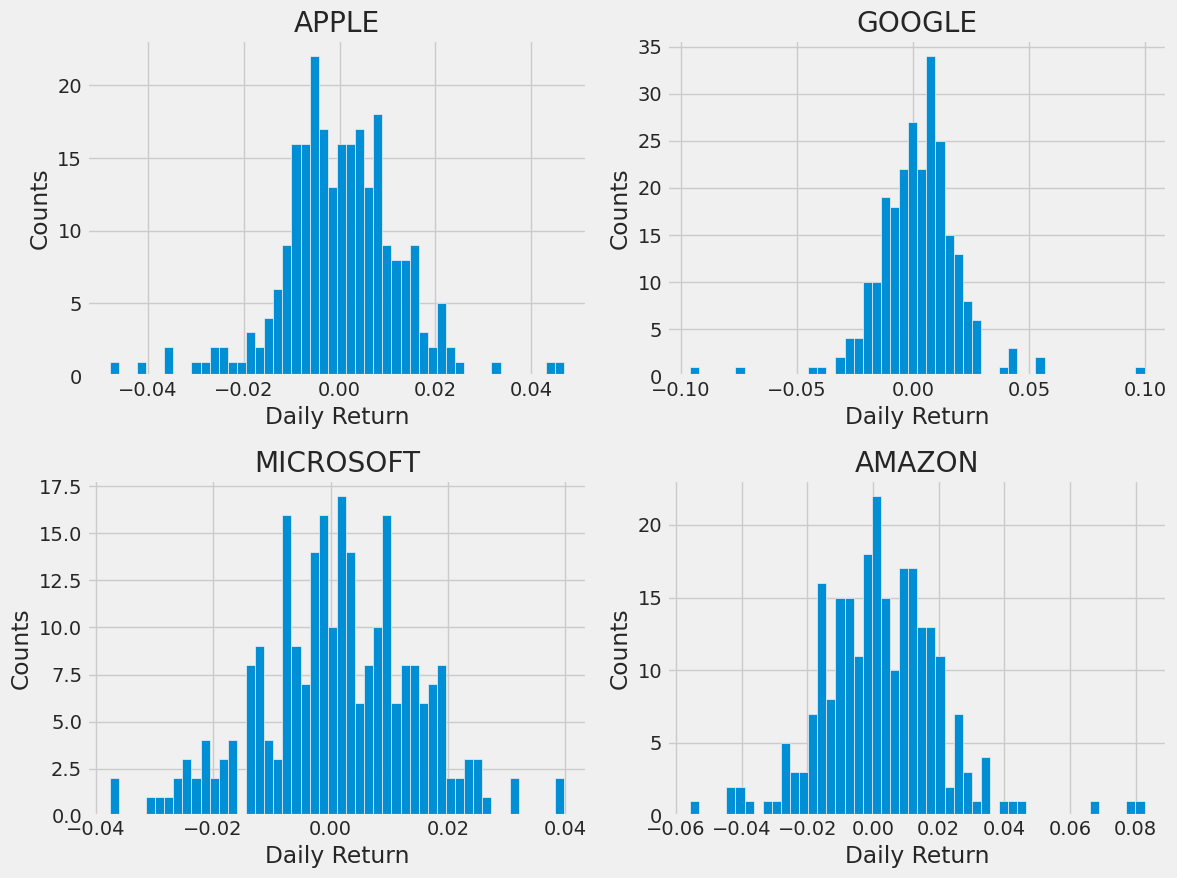

In [216]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

## the correlation between different stocks closing prices

In [217]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-28,NaN,NaN,NaN,NaN
2023-05-01,-0.000530,-0.032243,-0.004713,-0.005533
2023-05-02,-0.006191,0.015483,-0.016062,-0.000491
2023-05-03,-0.006467,0.000193,0.001321,-0.003307
2023-05-04,-0.009913,0.003377,-0.008575,0.003318


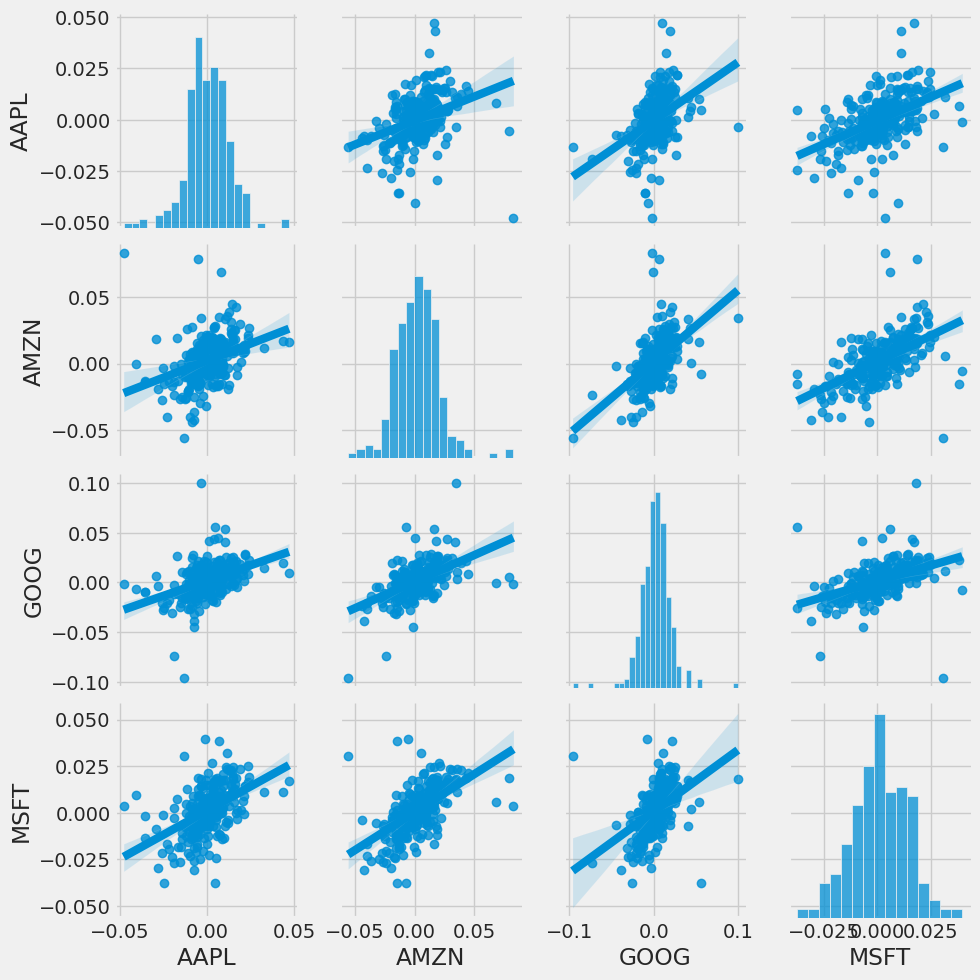

In [218]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

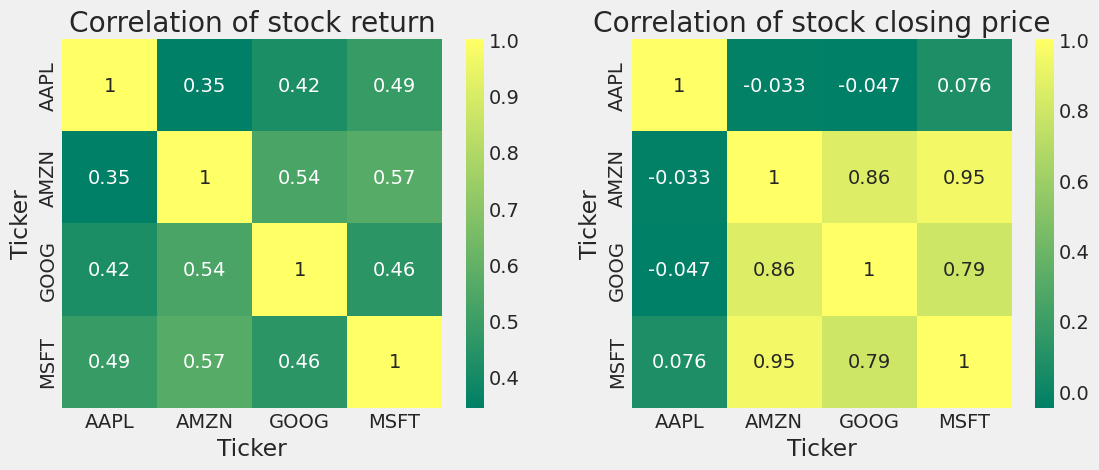

In [219]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Models

## Predicting the closing price stock price of APPLE inc

In [220]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771561,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800


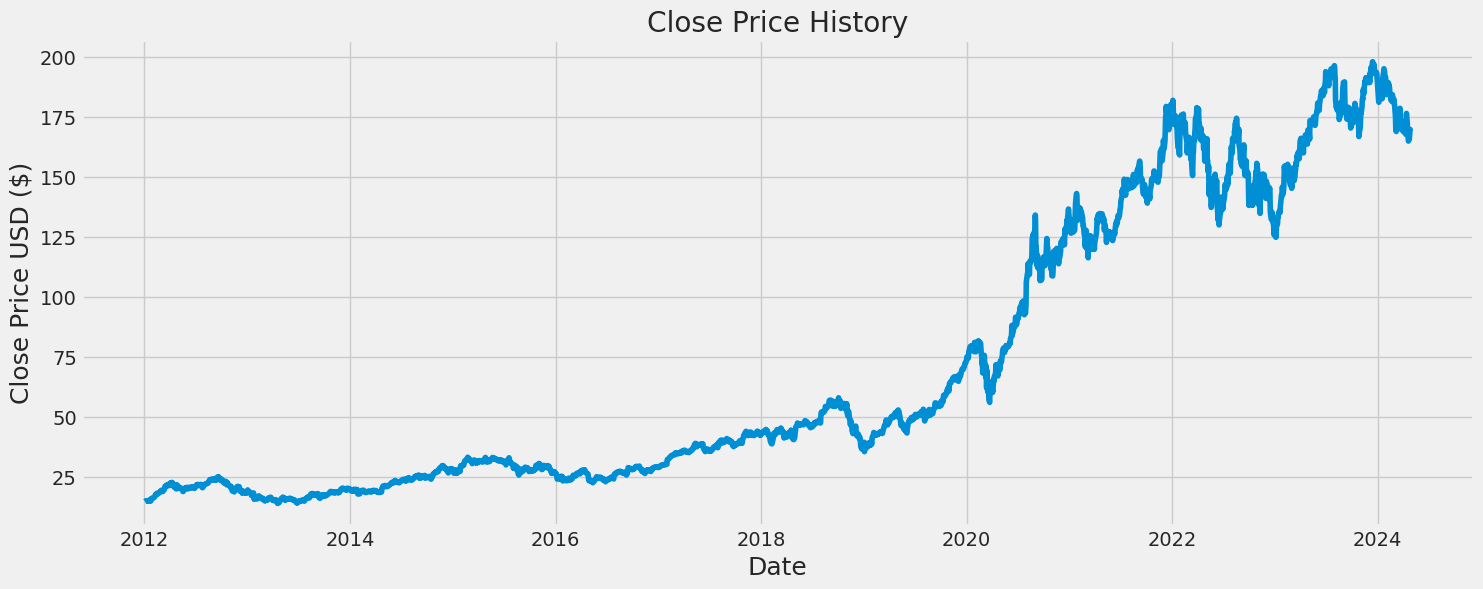

In [221]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [222]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2945

In [223]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.8420417 ],
       [0.84676576],
       [0.84356209]])

In [224]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [225]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

### LSTM - (long short-term memory)

In [226]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(x_train, y_train, batch_size=1, epochs=1)

2885/2885 [==============================] - 167s 57ms/step - loss: 0.0013


In [227]:
# Get the models predicted price values
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Get the root mean squared error (RMSE)
rmse_lstm = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse_lstm

5/5 [==============================] - 1s 39ms/step


3.4392396605792337

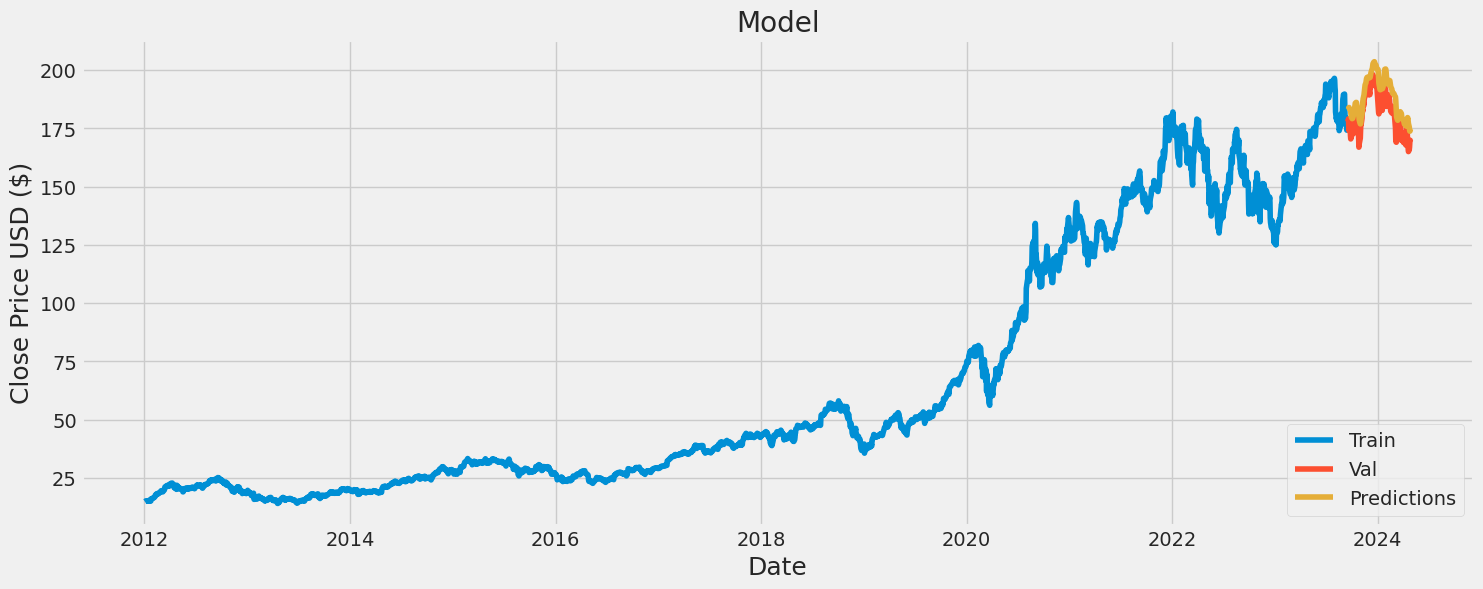

In [228]:
# Plot the data
train = data[:training_data_len]
valid_lstm = data[training_data_len:]
valid_lstm['Predictions'] = predictions_lstm
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_lstm[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### CNN (convolutional neural network)

In [229]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_cnn.fit(x_train, y_train, batch_size=1, epochs=1)


2885/2885 [==============================] - 10s 3ms/step - loss: 0.0019


In [230]:
# Get the models predicted price values
predictions_cnn = model_cnn.predict(x_test)
predictions_cnn = scaler.inverse_transform(predictions_cnn)

# Get the root mean squared error (RMSE)
rmse_cnn = np.sqrt(np.mean(((predictions_cnn - y_test) ** 2)))
rmse_cnn

5/5 [==============================] - 0s 3ms/step


7.856438245767193

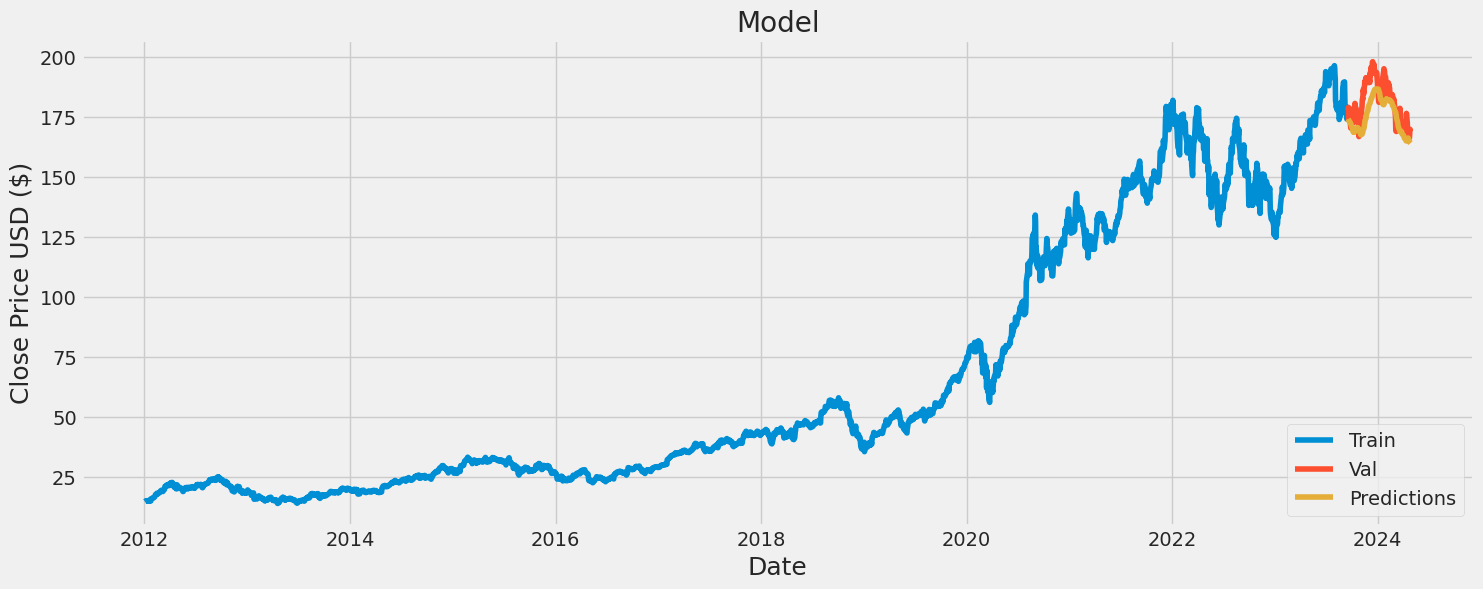

In [231]:
# Plot the data
train = data[:training_data_len]
valid_cnn = data[training_data_len:]
valid_cnn['Predictions'] = predictions_cnn
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_cnn[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### RandomForestRegressor

In [232]:
from sklearn.ensemble import RandomForestRegressor

# Reshape the data for Random Forest Regressor
x_train_rf = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))  # Reshape to 2D array

# Build the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(x_train_rf, y_train)

RandomForestRegressor(random_state=42)

In [233]:
# Reshape the data for Random Forest Regressor
x_test_rf = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))  # Reshape to 2D array

# Get the models predicted price values
predictions_rf = model_rf.predict(x_test_rf)# Reshape predictions_rf to match the expected input shape
predictions_rf = predictions_rf.reshape(-1, 1)

# Inverse transform the predictions
predictions_rf = scaler.inverse_transform(predictions_rf)

# Get the root mean squared error (RMSE)
rmse_rf = np.sqrt(np.mean(((predictions_rf - y_test) ** 2)))
rmse_rf

2.948478962036927

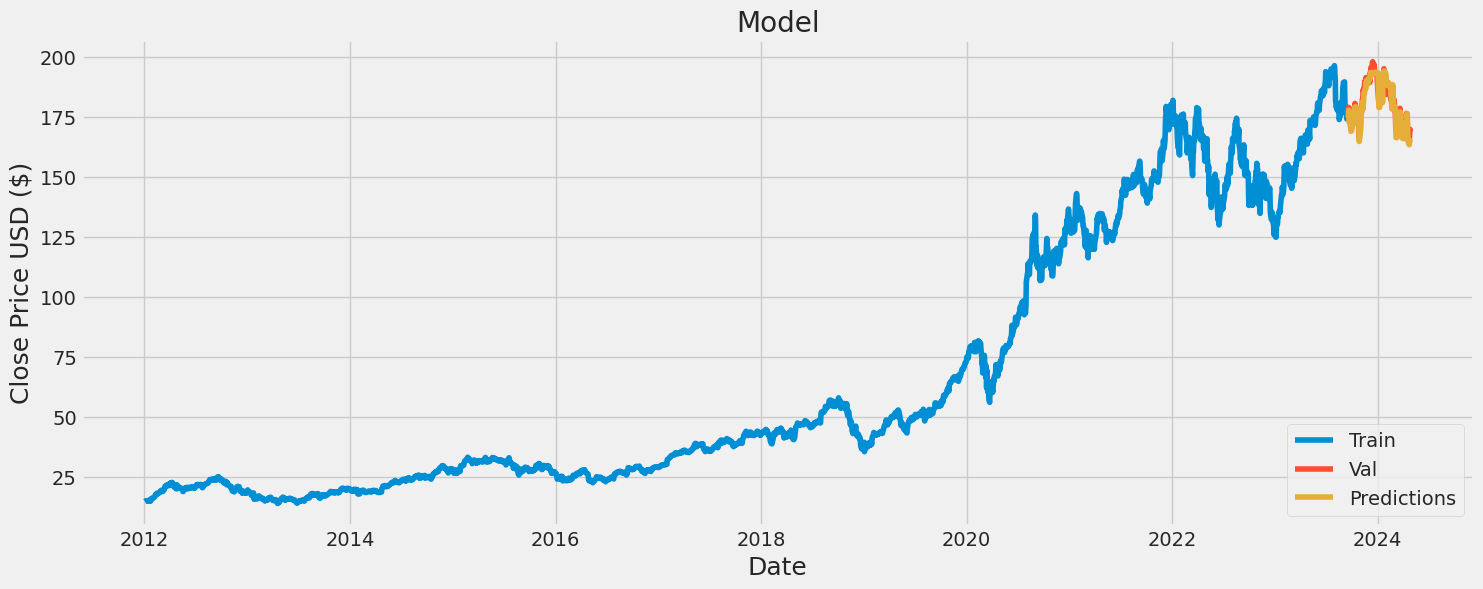

In [234]:
# Plot the data
train = data[:training_data_len]
valid_rf = data[training_data_len:]
valid_rf['Predictions'] = predictions_rf
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_rf[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### SVR - (Support Vector Regression)

In [235]:
from sklearn.svm import SVR

# Build the SVR model
model_svr = SVR(kernel='rbf', C=100, gamma='auto')

# Train the model
model_svr.fit(x_train_rf, y_train)

# Get the models predicted price values
predictions_svr = model_svr.predict(x_test_rf)
predictions_svr = predictions_svr.reshape(-1, 1)

# Inverse transform the predictions
predictions_svr = scaler.inverse_transform(predictions_svr)

# Get the root mean squared error (RMSE)
rmse_svr = np.sqrt(np.mean(((predictions_svr - y_test) ** 2)))
rmse_svr

9.735002956980743

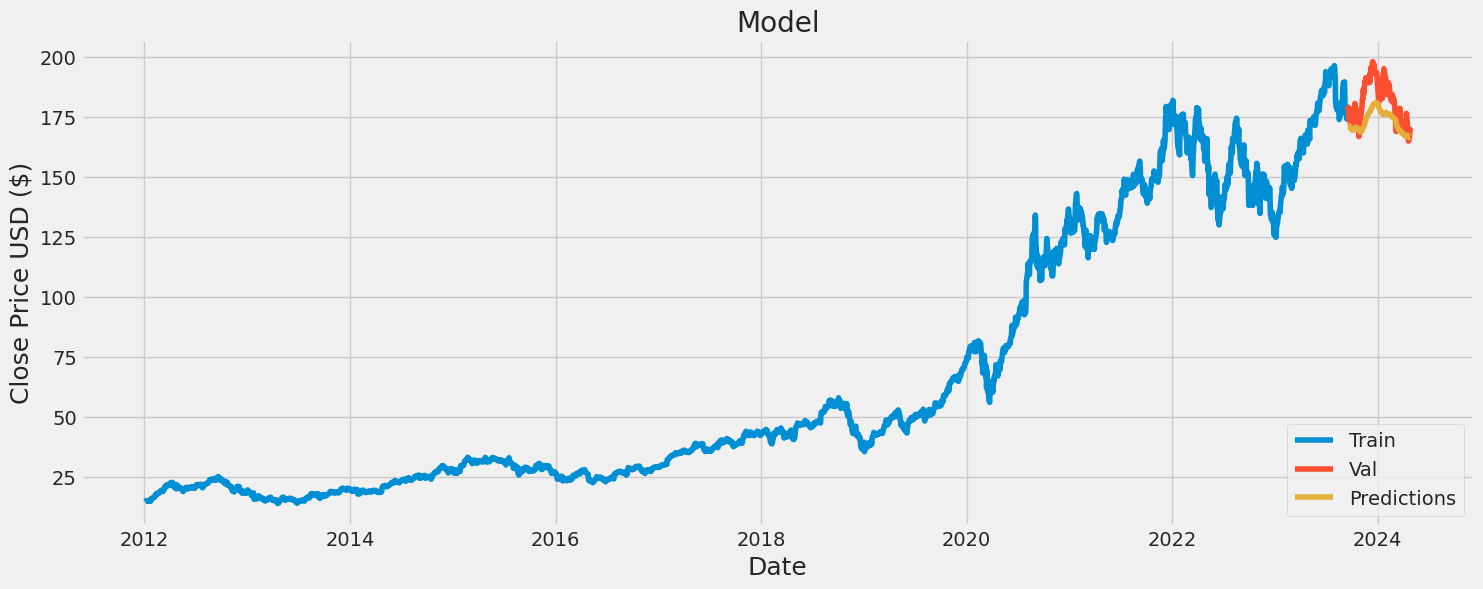

In [236]:
# Plot the data
train = data[:training_data_len]
valid_svr = data[training_data_len:]
valid_svr['Predictions'] = predictions_svr
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_svr[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## comparison

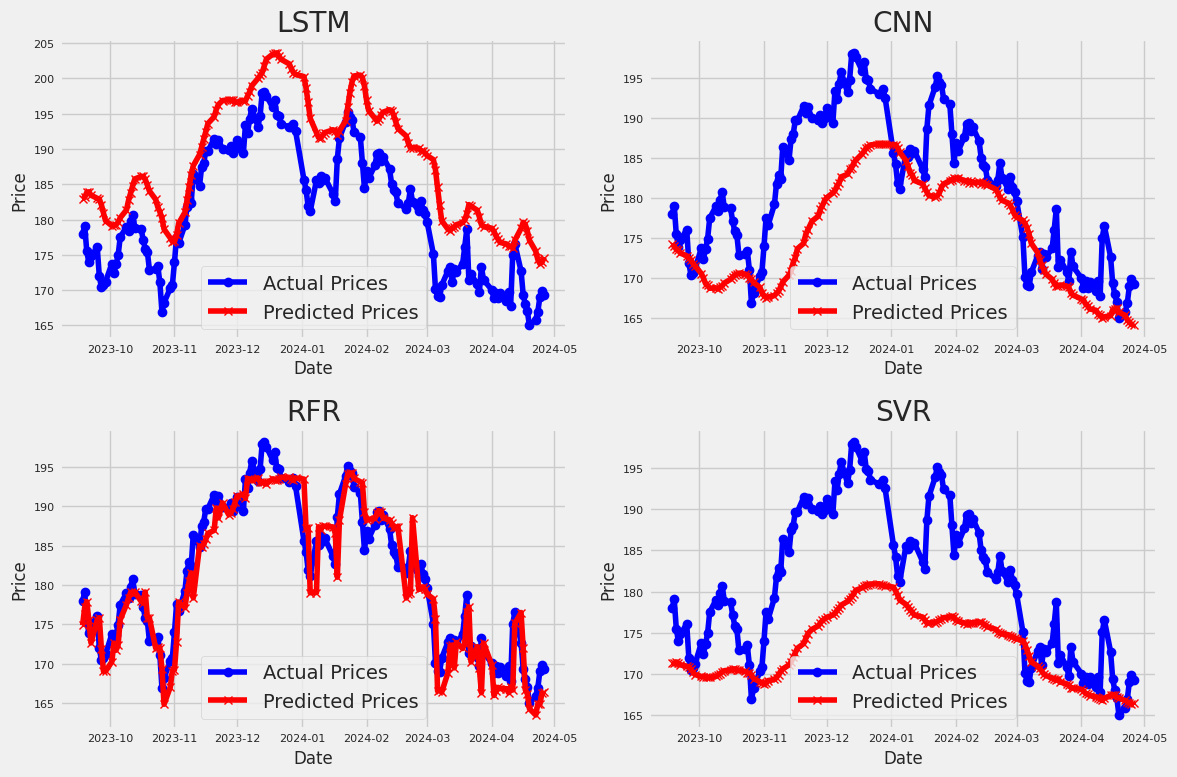

In [237]:
# Show the valid and predicted prices
import matplotlib.pyplot as plt

ml = ["LSTM", "CNN", "RFR", "SVR"]
valid_dates = [valid_lstm.index, valid_cnn.index, valid_rf.index, valid_svr.index]
valid_prices = [valid_lstm['Close'], valid_cnn['Close'], valid_rf['Close'], valid_svr['Close']]
predicted_prices = [valid_lstm['Predictions'], valid_cnn['Predictions'], valid_rf['Predictions'], valid_svr['Predictions']]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(len(ml)):
    row = i // 2
    col = i % 2

    axs[row, col].plot(valid_dates[i], valid_prices[i], label='Actual Prices', color='blue', marker='o')
    axs[row, col].plot(valid_dates[i], predicted_prices[i], label='Predicted Prices', color='red', marker='x')
    axs[row, col].set_title(ml[i])
    axs[row, col].set_xlabel('Date', fontsize=12)
    axs[row, col].set_ylabel('Price', fontsize=12)
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].tick_params(axis='both', which='both', labelsize=8)

plt.tight_layout()
plt.show()

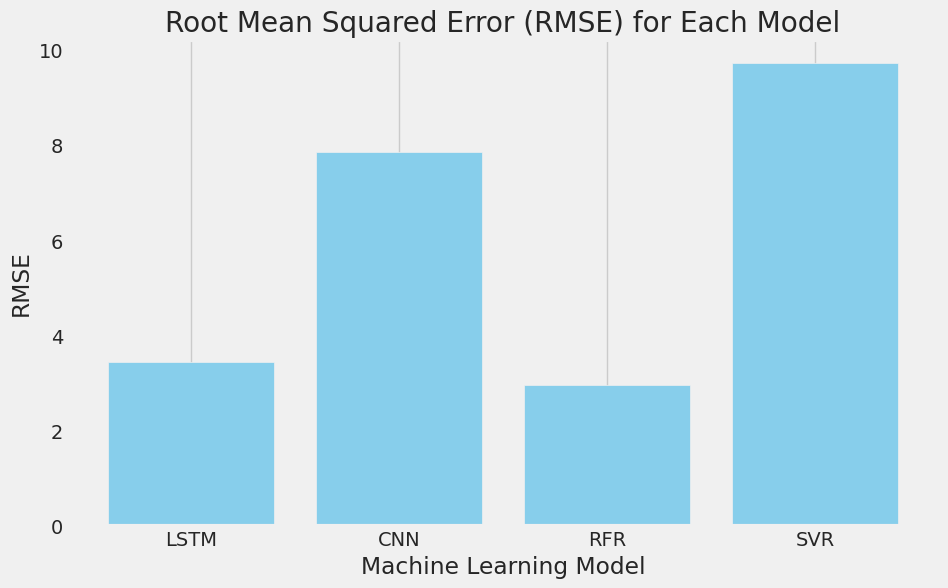

In [238]:
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [rmse_lstm, rmse_cnn, rmse_rf, rmse_svr]
ml = ["LSTM", "CNN", "RFR", "SVR"]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(ml, rmse_values, color='skyblue')
plt.title('Root Mean Squared Error (RMSE) for Each Model')
plt.xlabel('Machine Learning Model')
plt.ylabel('RMSE')
plt.grid(axis='y')
plt.show()

Intepretation